# <center>**Arbre De Decision**


In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


- On importe **pandas** et **numpy** pour manipuler les données.
- **matplotlib** et **seaborn** pour la visualisation.
- Les outils de **scikit-learn** pour créer et évaluer l'arbre de décision.


In [2]:
# Charger la version propre du dataset Titanic

df = pd.read_csv(r"C:\Users\TOSHIBA\Documents\analyse_project\titanic\titanic_clean.csv")

# Afficher les premières lignes
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Non-survécu,3ème classe,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survécu,3ème classe,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survécu,1ère classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,Non-survécu,3ème classe,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


In [5]:
#  Préparation des variables X (indépendantes) et y (dépendante)

# La variable cible est 'Survived'
y = df['Survived']

# Sélectionner les variables explicatives pertinentes
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Transformer les variables catégorielles en variables numériques avec get_dummies
X = pd.get_dummies(X, drop_first=True)

# Afficher les premières lignes de X
X.head()


,Age,SibSp,Parch,Fare,Pclass_2ème classe,Pclass_3ème classe,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,22.0,1,0,7.2500,False,True,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,True,False,False,True
3,35.0,1,0,53.1000,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,True,False,True


On définit **y** comme la variable cible (Survived) qui indique si le passager a survécu (1) ou non (0).
On sélectionne les variables explicatives les plus pertinentes pour la prédiction:

- **Pclass**: Classe du passager (1ère, 2ème, 3ème)
- **Sex**: Genre du passager
- **Age**: Âge du passager
- **SibSp**: Nombre de frères/sœurs/conjoints à bord
- **Parch**: Nombre de parents/enfants à bord
- **Fare**: Prix du billet
- **Embarked**: Port d'embarquement



La fonction **get_dummies** transforme les variables catégorielles en variables binaires (one-hot encoding).
L'affichage montre les données après transformation.

In [6]:
#  Séparer les données en training set et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#  Dans cette cellule :
- On divise le dataset en **70% pour l'entraînement** et **30% pour le test**.
- Cela permet de tester l'efficacité du modèle sur des données qu'il n'a jamais vues.
- Le paramètre **random_state=42** assure la reproductibilité des résultats.

In [7]:
# Création et entraînement du modèle d'Arbre de Décision

arbre = DecisionTreeClassifier(criterion='entropy', random_state=42)
arbre.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

On crée un modèle d'arbre de décision avec comme critère l'**entropie**.

- L'entropie mesure l'impureté ou le désordre dans un ensemble de données.
- Elle aide à déterminer les meilleures divisions dans l'arbre.



Puis on **entraîne (fit)** le modèle sur les données d'entraînement.
Le modèle apprend à prédire la survie en fonction des caractéristiques des passagers.

In [9]:
#  Prédiction sur les données de test

y_pred = arbre.predict(X_test)


#  Dans cette cellule :
- Le modèle fait des **prédictions** sur les données de test.
- Ces prédictions seront comparées aux valeurs réelles pour évaluer la performance du modèle.

In [11]:
# Évaluation des performances du modèle

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))


Accuracy : 0.7723880597014925

Classification Report :
               precision    recall  f1-score   support

 Non-survécu       0.79      0.83      0.81       157
     Survécu       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



#  Dans cette cellule :
On affiche l'**exactitude (accuracy)** du modèle, qui est d'environ 77.23%.

- Cela signifie que le modèle prédit correctement la survie dans environ 77% des cas.



On génère un **rapport de classification** avec précision, rappel et f1-score pour chaque classe:

- Pour les **non-survivants (0)**: précision de 0.79, rappel de 0.83, f1-score de 0.81
- Pour les **survivants (1)**: précision de 0.75, rappel de 0.68, f1-score de 0.71
- Ces métriques montrent que le modèle est légèrement meilleur pour prédire les non-survivants que les survivants.

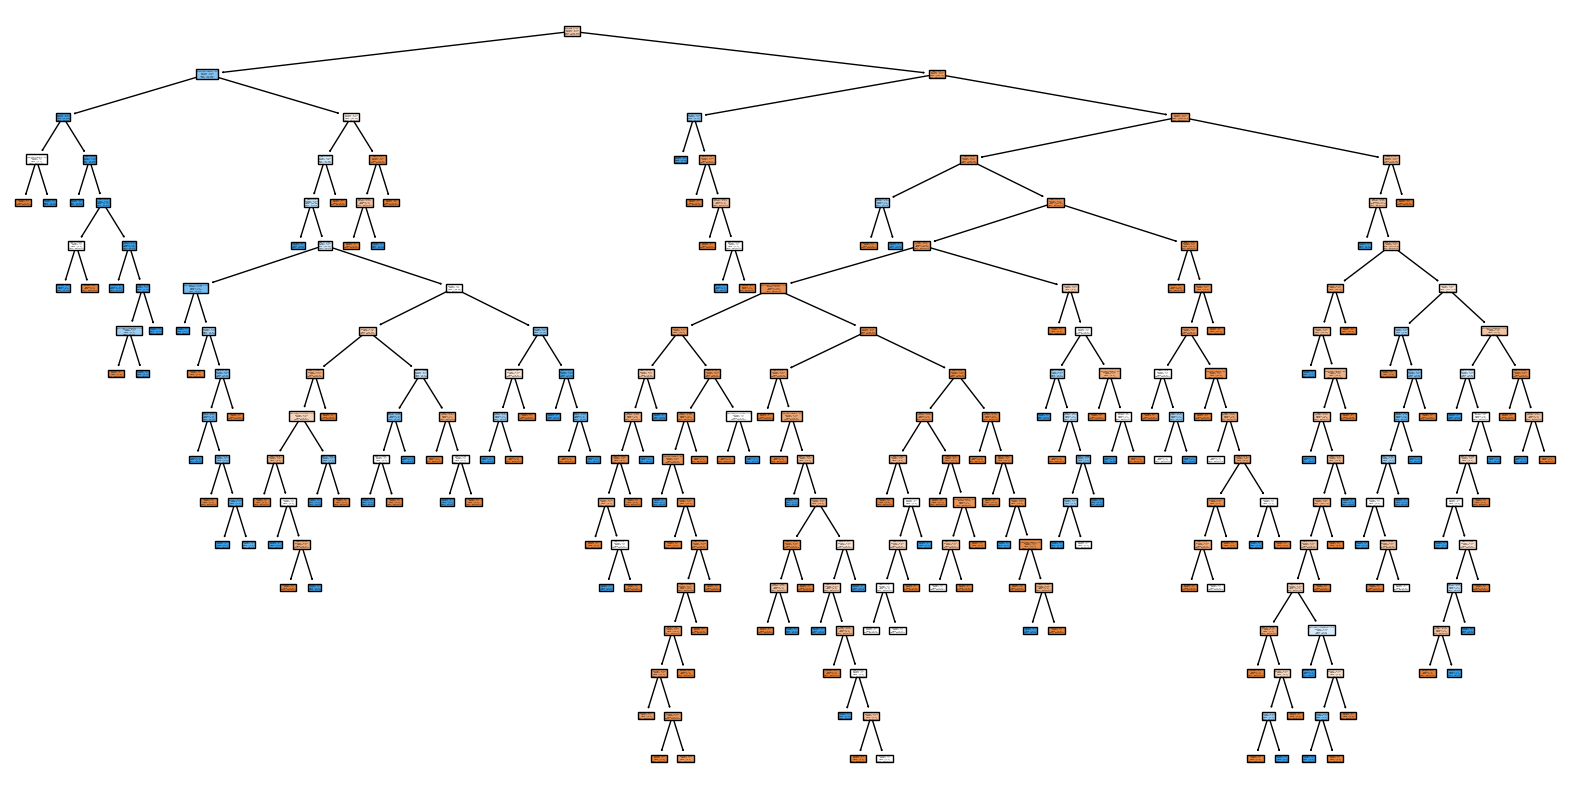

In [10]:
# Visualisation de l'Arbre de Décision

plt.figure(figsize=(20,10))
plot_tree(arbre, feature_names=X.columns, class_names=arbre.classes_, filled=True)
plt.show()


# Dans cette cellule :
Cette cellule génère une visualisation graphique de l'arbre de décision.
Chaque nœud montre:

- La règle de décision (ex: Age ≤ 13.5)
- La classe majoritaire dans ce nœud
- La proportion de chaque classe



Les nœuds sont colorés selon la classe majoritaire (bleu pour non-survivant, orange pour survivant).
Cette visualisation permet de comprendre comment le modèle prend ses décisions.
